# High Dimensional Data Analysis: Wine Dataset

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
%matplotlib inline

# ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

In [3]:
data.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


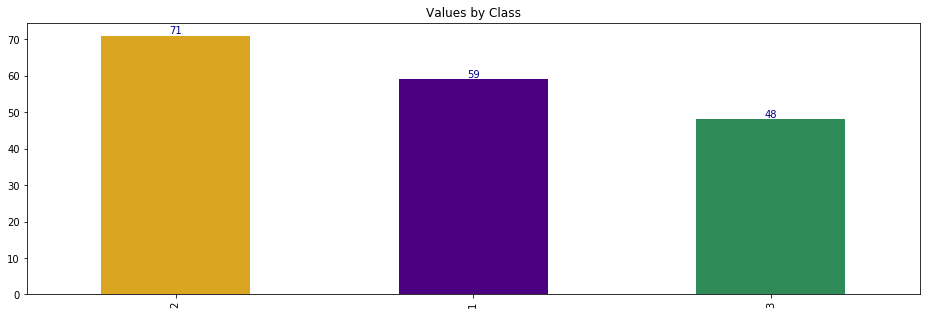

In [5]:
plt.figure(figsize=(16,5))
data['Class'].value_counts().plot(kind='bar', color=['goldenrod','indigo','seagreen'], title="Values by Class")

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='darkblue', ha='center', va='bottom')

In [5]:
X.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


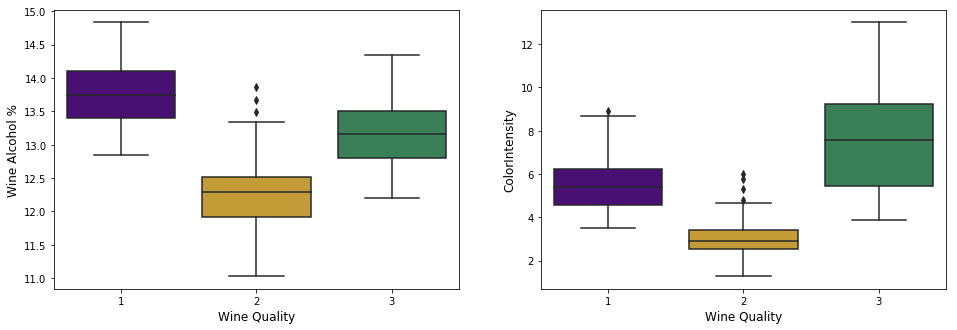

In [6]:
plt.figure(figsize=(16,5))

plt.subplot(121)
g = sns.boxplot(x="Class",y="Alcohol", data=data,palette=['indigo','goldenrod','seagreen'])
g.set_xlabel("Wine Quality", fontsize=12)
g.set_ylabel("Wine Alcohol %", fontsize=12)


plt.subplot(122)
g1 = sns.boxplot(x='Class', y="ColorIntensity",data=data, palette=['indigo','goldenrod','seagreen'])
g1.set_xlabel ("Wine Quality", fontsize=12)
g1.set_ylabel("ColorIntensity", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)
plt.show()

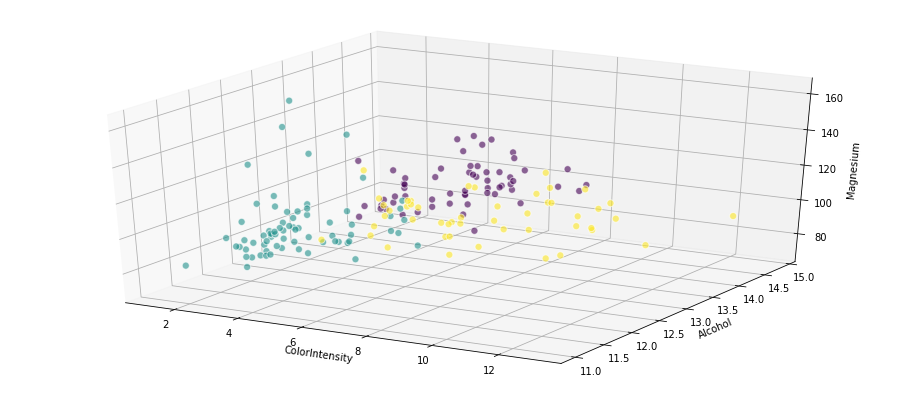

In [14]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(16, 7))
ax = fig.gca(projection='3d')

xs = data['ColorIntensity']
ys = data['Alcohol']
zs = data['Magnesium']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', c=data['Class'])

ax.set_xlabel('ColorIntensity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Magnesium');

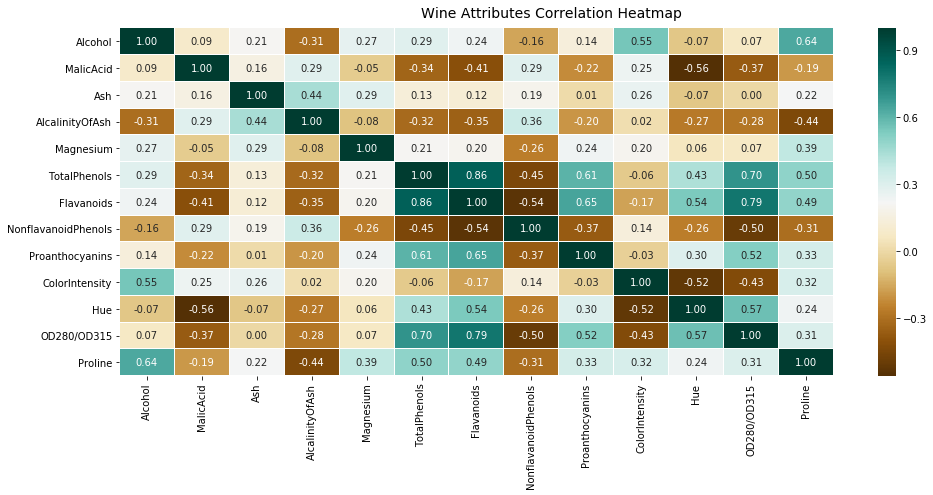

In [12]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(16, 6))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap='BrBG',fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

In [9]:
mms = MinMaxScaler()
mms.fit(X)
X_norm = pd.DataFrame(mms.transform(X), columns=X.columns)

In [10]:
X_norm.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# Dimensionality Reduction

## Principal Component Analysis (PCA)

PCA - one of the most broadly used of unsupervised dimensionality reduction algorithms. 
PCA can be described as an unsupervised algorithm, since it ignores class labels and its goal is to find the directions that maximize the variance in a dataset. Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line.
It can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering. 

In [114]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm, y)

In [115]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352])

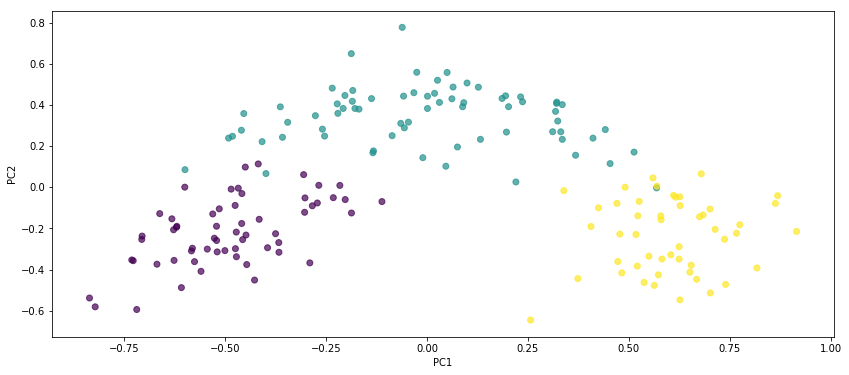

In [139]:
fig = plt.figure(figsize=(14,6))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    alpha=0.7,)

## Linear discriminant analysis (LDA)

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique. The general LDA approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

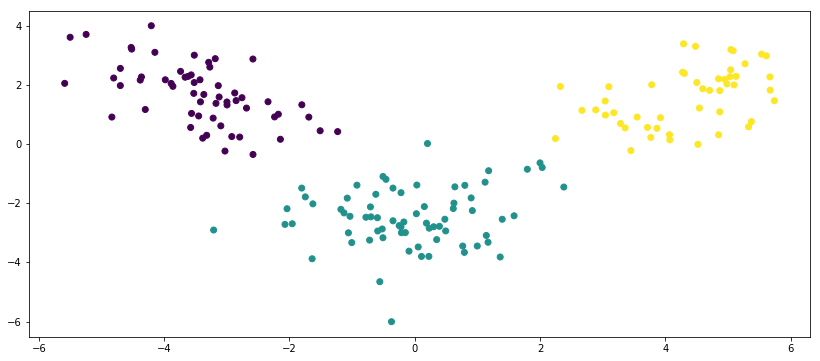

In [136]:
fig = plt.figure(figsize=(14,6))

lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))
lda_transformed['Class'] = y

# Plot all three series
plt.scatter(lda_transformed[0], lda_transformed[1], c=lda_transformed['Class'])

## Parallel coordinates method 

This type of visualisation is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them. 

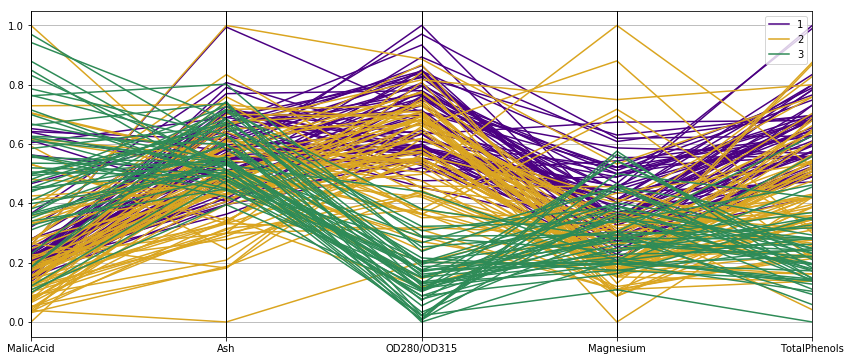

In [81]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(14,6))

# Select features to include in the plot
plot_feat = ['MalicAcid', 'Ash', 'OD280/OD315', 'Magnesium','TotalPhenols']

# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)

# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'Class', color=['indigo','goldenrod','seagreen']);

## Andrews Curves

Andrews curve belongs to a family of visualization techniques where the high-dimensional data are projected into a vector space so that each data point takes the form of a line or curve. It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothed version of a parallel coordinate plot. 
If there is structure in the data, it may be visible in the Andrews curves of the data. Some of their uses include the quality control of products, the detection of period and outliers in time series, the visualization of learning in artificial neural networks, and correspondence analysis.

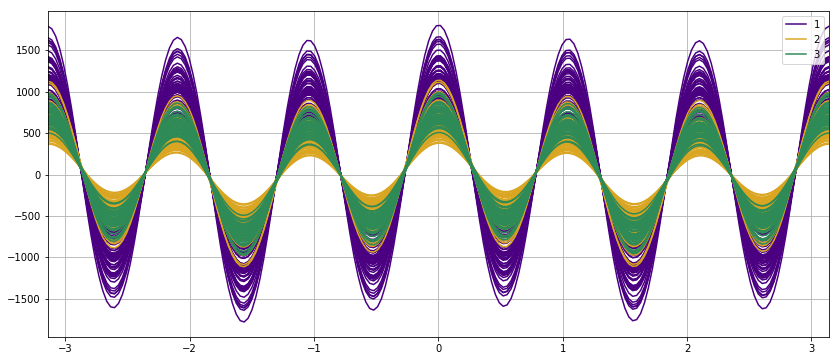

In [83]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(14,6))
andrews_curves(data, 'Class',color=['indigo','goldenrod','seagreen']);

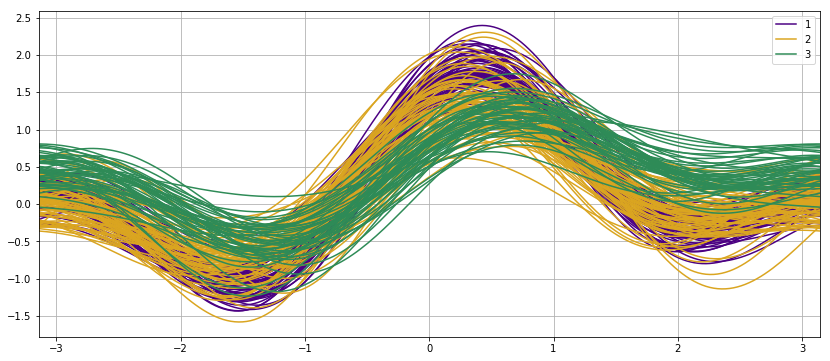

In [84]:
plt.figure(figsize=(14,6))
andrews_curves(data_norm, 'Class', color=['indigo','goldenrod','seagreen'])

## RadViz

The RADVIZ a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization. However, in this case the mapping is nonlinear. 

Data scientists use this method to detect separability between classes. 

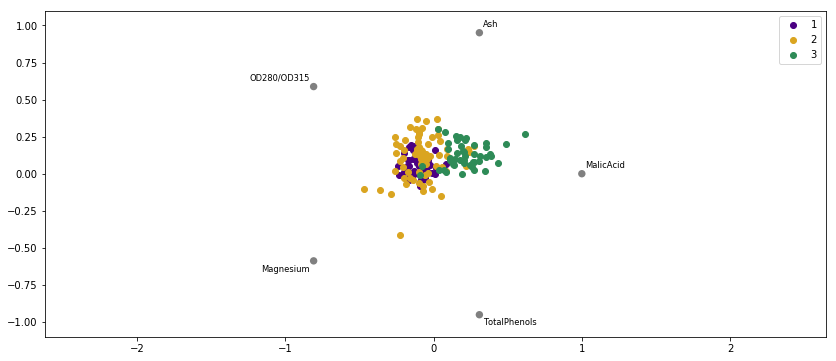

In [85]:
from pandas.plotting import radviz
plt.figure(figsize=(14,6))

radviz(data_norm, 'Class', color=['indigo','goldenrod','seagreen'])